In [81]:
import creating_baskets as cb #imports our custom creating_baskets script as cb
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

In [82]:
#Creating Baskets
market_baskets = cb.CreateBaskets()

In [83]:
# we want to validate the number of baskets we created
print("Number of Baskets = ", len(market_baskets))
print("\n")
#Making sure it works
print("Examples of Baskets --> \n")
for item in market_baskets.values():
    print(item)


Number of Baskets =  1536


Examples of Baskets --> 

['womens200back', 'womens200im', 'womens100im', 'womens100back']
['womens200back', 'womens50back', 'womens50fly', 'womens100back']
['womens200back', 'womens50back', 'womens100back', 'womens100free']
['womens200back', 'womens200im', 'womens50back', 'womens100back']
['womens200back', 'womens100fly', 'womens50fly', 'womens100back']
['womens200back', 'womens200im', 'womens100im', 'womens100back']
['womens200back', 'womens50fly', 'womens100back']
['womens200back', 'womens200free', 'womens1000free', 'womens500free']
['womens200back', 'womens50back', 'womens100back']
['womens200back', 'womens200free', 'womens500free', 'womens100free']
['womens200back', 'womens200free', 'womens1000free', 'womens500free']
['womens200back', 'womens200free', 'womens500free', 'womens100free']
['womens200back', 'womens200im', 'womens1000free', 'womens500free']
['womens200back', 'womens200im', 'womens50back', 'womens100back']
['womens200back', 'womens200im', 'wom

In [84]:
#Creating a hash table that links the event to an integer
#this step is very important because algorithms are much better and faster when
#item are encoded as integers instead of strings. Comparisons are much faster
#and will take up much less memory
counter = 0
events_hash = {}


for events in market_baskets.values():
    for event in events:
        if event not in events_hash:
            events_hash[event] = counter
            counter += 1

print(events_hash)
# m = number of total events
#Will be used for later
m = len(events_hash)
print("Total number of events: ", m)
assert(m == 34)

{'womens200back': 0, 'womens200im': 1, 'womens100im': 2, 'womens100back': 3, 'womens50back': 4, 'womens50fly': 5, 'womens100free': 6, 'womens100fly': 7, 'womens200free': 8, 'womens1000free': 9, 'womens500free': 10, 'womens50free': 11, 'womens400IM': 12, 'womens200fly': 13, 'womens100breast': 14, 'womens50breast': 15, 'womens200breast': 16, 'mens200im': 17, 'mens100breast': 18, 'mens100free': 19, 'mens200fly': 20, 'mens200free': 21, 'mens200breast': 22, 'mens100i': 23, 'mens100back': 24, 'mens100fly': 25, 'mens200back': 26, 'mens400IM': 27, 'mens50breast': 28, 'mens500free': 29, 'mens50Free': 30, 'mens50back': 31, 'mens1000free': 32, 'mens50fly': 33}
Total number of events:  34


In [85]:
#Calculating all event supports
#start by declaring all event counts to 0 before our loops
event_supports = np.zeros(m)

#as we examine every swimmer's events, we increment the count of each 
#unique event using its hash to index our supports array
for row in market_baskets.items():
    events = row[1]
    for event in events:
        event_supports[events_hash[event]] += 1

#we normalize all of our counts with the number of total market baskets to get our supports
event_supports = event_supports/len(market_baskets)

#now we can explore what some of our supports look like
#lets make a reverse hash to provide event names given ID, making this a little more human readable
reverse_events_hash = {v: k for k, v in events_hash.items()}

print("EVENT ID | EVENT NAME | EVENT SUPPORT")
for i in range(len(event_supports)):
    print(i,reverse_events_hash[i], event_supports[i])

EVENT ID | EVENT NAME | EVENT SUPPORT
0 womens200back 0.041015625
1 womens200im 0.08919270833333333
2 womens100im 0.09895833333333333
3 womens100back 0.09375
4 womens50back 0.109375
5 womens50fly 0.11979166666666667
6 womens100free 0.11848958333333333
7 womens100fly 0.09049479166666667
8 womens200free 0.09309895833333333
9 womens1000free 0.017578125
10 womens500free 0.02734375
11 womens50free 0.126953125
12 womens400IM 0.044270833333333336
13 womens200fly 0.024088541666666668
14 womens100breast 0.08984375
15 womens50breast 0.10091145833333333
16 womens200breast 0.048177083333333336
17 mens200im 0.08919270833333333
18 mens100breast 0.09244791666666667
19 mens100free 0.11848958333333333
20 mens200fly 0.039713541666666664
21 mens200free 0.11328125
22 mens200breast 0.047526041666666664
23 mens100i 0.06380208333333333
24 mens100back 0.10091145833333333
25 mens100fly 0.107421875
26 mens200back 0.03515625
27 mens400IM 0.030598958333333332
28 mens50breast 0.10872395833333333
29 mens500free 0.0

In [86]:
#as a sanity check, we can see what are the top 5 supports
#this should give us the 5 most popular events to swim
top5_indices = np.argsort(event_supports)[-5:][::-1]
counter = 1
print("Top 5 Most Popular Swims")
for idx in top5_indices:
    print("Number:", counter)
    counter += 1
    print(idx, reverse_events_hash[idx], event_supports[idx])


Top 5 Most Popular Swims
Number: 1
30 mens50Free 0.1484375
Number: 2
33 mens50fly 0.14778645833333334
Number: 3
11 womens50free 0.126953125
Number: 4
31 mens50back 0.12434895833333333
Number: 5
5 womens50fly 0.11979166666666667


Seems like the sprint events are by far the most popular, since the top 5 events are all different strokes of the shortest yardage.

In [87]:
bottom5_indices = np.argsort(event_supports)[:5] 
counter = 1
print("\nBottom 5 Least Popular Swims")
for idx in bottom5_indices:
    print("Number:", counter)
    counter += 1
    print(idx, reverse_events_hash[idx], event_supports[idx])


Bottom 5 Least Popular Swims
Number: 1
9 womens1000free 0.017578125
Number: 2
32 mens1000free 0.022786458333333332
Number: 3
13 womens200fly 0.024088541666666668
Number: 4
10 womens500free 0.02734375
Number: 5
27 mens400IM 0.030598958333333332


Most curiously we can see how the distance events take the cake for the least popular events. The womens 1000 free and the mens 1000 free take the gold and silver medal spot for least popular events, followed closely by the womens 200 fly which is infamously considered one of the most painful swims by many athletes. 

In [88]:
print(reverse_events_hash)

{0: 'womens200back', 1: 'womens200im', 2: 'womens100im', 3: 'womens100back', 4: 'womens50back', 5: 'womens50fly', 6: 'womens100free', 7: 'womens100fly', 8: 'womens200free', 9: 'womens1000free', 10: 'womens500free', 11: 'womens50free', 12: 'womens400IM', 13: 'womens200fly', 14: 'womens100breast', 15: 'womens50breast', 16: 'womens200breast', 17: 'mens200im', 18: 'mens100breast', 19: 'mens100free', 20: 'mens200fly', 21: 'mens200free', 22: 'mens200breast', 23: 'mens100i', 24: 'mens100back', 25: 'mens100fly', 26: 'mens200back', 27: 'mens400IM', 28: 'mens50breast', 29: 'mens500free', 30: 'mens50Free', 31: 'mens50back', 32: 'mens1000free', 33: 'mens50fly'}


In [89]:
#Calculating pairs
pairs = {}
#Setting all possible pairs to 0 first, as this will aid us in computing the ideal meet schedule with distances.
#Upper Triangular will keep us from counting any pairs twice 
#such as (i,j) and (j,i)
for i in range(m):
    for j in range(i+1, m):
        pairs[i,j] = 0

#Looking through all baskets and counting pairs
for basket in market_baskets.values():
    for i in range(len(basket)):
        for j in range(i + 1, len(basket)):
            e1 = events_hash[basket[i]]
            e2 = events_hash[basket[j]]

            #ensure that we have (smaller ID, bigger ID) pairings makes sure
            #that our event tuples match our pairs{} dict initialization
            if (e1 < e2):
                pairs[e1,e2] += 1
            else:
                pairs[e2,e1] += 1
#print(pairs)

#Ensuring that we have an upper triangular matrix
test_matrix = np.zeros((m,m))
for key, value in pairs.items():
    test_matrix[key[0], key[1]] = value
print(test_matrix)

#double check our upper triangular matrix has a clean diagonal
for diagonal_index in range(m):
    assert (test_matrix[diagonal_index, diagonal_index] ==0)

[[ 0. 20. 10. ...  0.  0.  0.]
 [ 0.  0. 46. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  0.  1. 48.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]]


Now that support pairs are calculated, we can start exploring some pretty interesting things! We can see what are the most and least common event pairings, and we can also can start taking steps to explore the big question of what is the most ideal meet schedule?

In [90]:
#little test for sanity check
#this should most logically include 2 sprint events since they were the most popular
#standalone events
max_pair = max(pairs, key = pairs.get)
first = max_pair[0]
second = max_pair[1]
print(reverse_events_hash[first], reverse_events_hash[second])

mens100free mens50Free


In [91]:
#getting most popular pairs
sorted_items = sorted(pairs.items(), key=lambda x: x[1], reverse=True)
#take top n
top_n = sorted_items[:20]
for k, v in top_n:
    print(f"{reverse_events_hash[k[0]], reverse_events_hash[k[1]]}: {v}")

('mens100free', 'mens50Free'): 119
('womens100free', 'womens50free'): 109
('mens100back', 'mens50back'): 109
('mens100breast', 'mens50breast'): 102
('womens100back', 'womens50back'): 98
('womens100breast', 'womens50breast'): 98
('mens100fly', 'mens50fly'): 97
('mens50Free', 'mens50fly'): 96
('womens50fly', 'womens50free'): 81
('womens50fly', 'womens100fly'): 77
('mens100free', 'mens200free'): 77
('womens100free', 'womens200free'): 75
('mens100free', 'mens50fly'): 64
('mens100breast', 'mens200breast'): 59
('womens100breast', 'womens200breast'): 58
('womens50back', 'womens50free'): 55
('womens100im', 'womens50fly'): 53
('womens50fly', 'womens100free'): 51
('mens200breast', 'mens50breast'): 49
('womens100im', 'womens100breast'): 48


We can examine the top n events above. To make this a little cleaner we can split up the genders to see if the ordering for event pairs are identical between both mens and womens. 

In [92]:
#define mens bucket and womens bucket for eventual string comparisons
mens_bucket = []
womens_bucket = []
for (e1, e2), count in top_n:
    name1 = reverse_events_hash[e1]
    name2 = reverse_events_hash[e2]

    #put the pair in the right gender bucket
    if name1.startswith("mens") and name2.startswith("mens"):
        mens_bucket.append(((name1, name2), count))
    elif name1.startswith("womens") and name2.startswith("womens"):
        womens_bucket.append(((name1, name2), count))

#print some side-by-side comparisons
print("\nTop 5 Men's vs Women's Event Pairings\n")
print(f"{'Men\'s Pairings':<50}{'Women\'s Pairings'}")
print("-" * 90)

for i in range(5):
    mens_info = f"{mens_bucket[i][0][0]} and {mens_bucket[i][0][1]} ({mens_bucket[i][1]} times)" if i < len(mens_bucket) else "N/A"
    womens_info = f"{womens_bucket[i][0][0]} and {womens_bucket[i][0][1]} ({womens_bucket[i][1]} times)" if i < len(womens_bucket) else "N/A"
    print(f"{mens_info:<50}{womens_info}")


Top 5 Men's vs Women's Event Pairings

Men's Pairings                                    Women's Pairings
------------------------------------------------------------------------------------------
mens100free and mens50Free (119 times)            womens100free and womens50free (109 times)
mens100back and mens50back (109 times)            womens100back and womens50back (98 times)
mens100breast and mens50breast (102 times)        womens100breast and womens50breast (98 times)
mens100fly and mens50fly (97 times)               womens50fly and womens50free (81 times)
mens50Free and mens50fly (96 times)               womens50fly and womens100fly (77 times)


This is what we expected, but nonetheless exciting! We can see that the top 5 most frequent pairings for both mens and womens are nearly identical, with the small exception that number 4 and number 5 are flipped respectively. 

In [93]:
#lets try exploring the bottom 
bottom_n = sorted_items[:-10]
for k, v in bottom_n:
    print(f"{reverse_events_hash[k[0]], reverse_events_hash[k[1]]}: {v}")

('mens100free', 'mens50Free'): 119
('womens100free', 'womens50free'): 109
('mens100back', 'mens50back'): 109
('mens100breast', 'mens50breast'): 102
('womens100back', 'womens50back'): 98
('womens100breast', 'womens50breast'): 98
('mens100fly', 'mens50fly'): 97
('mens50Free', 'mens50fly'): 96
('womens50fly', 'womens50free'): 81
('womens50fly', 'womens100fly'): 77
('mens100free', 'mens200free'): 77
('womens100free', 'womens200free'): 75
('mens100free', 'mens50fly'): 64
('mens100breast', 'mens200breast'): 59
('womens100breast', 'womens200breast'): 58
('womens50back', 'womens50free'): 55
('womens100im', 'womens50fly'): 53
('womens50fly', 'womens100free'): 51
('mens200breast', 'mens50breast'): 49
('womens100im', 'womens100breast'): 48
('mens50back', 'mens50fly'): 48
('womens200im', 'womens100im'): 46
('mens50Free', 'mens50back'): 46
('womens200back', 'womens100back'): 43
('womens50back', 'womens50fly'): 43
('womens50breast', 'womens200breast'): 43
('mens100fly', 'mens50Free'): 43
('womens100

In [94]:
'''
This whole cell mimics logic as counting the top 5 respective pairings for each gender as above, just with the least frequent pairings
It shows some interesting insights
'''


sorted_items_least = sorted(pairs.items(), key=lambda x: x[1], reverse=False)
mens_bucket_least = []
womens_bucket_least = []
for (e1, e2), count in sorted_items_least:
    name1 = reverse_events_hash[e1]
    name2 = reverse_events_hash[e2]
    if name1.startswith("mens") and name2.startswith("mens") and len(mens_bucket_least) < 5:
        mens_bucket_least.append(((name1, name2), count))
    elif name1.startswith("womens") and name2.startswith("womens") and len(womens_bucket_least) < 5:
        womens_bucket_least.append(((name1, name2), count))
    if len(mens_bucket_least) == 5 and len(womens_bucket_least) == 5:
        break


print("\nBottom 5 Men's vs Women's Event Pairings\n")
print(f"{'Men\'s Pairings':<50}{'Women\'s Pairings'}")
print("-" * 90)
for i in range(5):
    mens_info = f"{mens_bucket_least[i][0][0]} and {mens_bucket_least[i][0][1]} ({mens_bucket_least[i][1]} times)" if i < len(mens_bucket_least) else "N/A"
    womens_info = f"{womens_bucket_least[i][0][0]} and {womens_bucket_least[i][0][1]} ({womens_bucket_least[i][1]} times)" if i < len(womens_bucket_least) else "N/A"
    print(f"{mens_info:<50}{womens_info}")


Bottom 5 Men's vs Women's Event Pairings

Men's Pairings                                    Women's Pairings
------------------------------------------------------------------------------------------
mens100breast and mens200back (0 times)           womens200back and womens200breast (0 times)
mens100breast and mens1000free (0 times)          womens100im and womens1000free (0 times)
mens200fly and mens200back (0 times)              womens100back and womens1000free (0 times)
mens200breast and mens200back (0 times)           womens100back and womens500free (0 times)
mens100i and mens1000free (0 times)               womens50back and womens1000free (0 times)


Here are some very interesting results as we can see many pairings for both mens and womens events that are NEVER swum together in our dataset! Most intuitively, many of these pairings include a long distance event and a spring event, as most sprint swimmers or distance swimmers tend to stick to their respective field. 

In [95]:
print(events_hash["mens1000free"])
print(events_hash["mens500free"])
print(events_hash["mens200free"])
print(events_hash["mens100free"])
print(events_hash["mens50Free"])
print(events_hash["mens100breast"])
print(events_hash["mens200breast"])
print(events_hash["mens50Free"])

32
29
21
19
30
18
22
30


In [96]:
#heres a default meet lineup where events are just listed in order of their ID number
#nothing complicated here, and this schedule shouldn't score very well
test_array = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]

#dist(i,j) = support(i,j) * 1/|pos(i) - pos(j)|


#we also define our distance function here! 
#events that are closer score higher, multiplied by the respective frequency of that pair to normalize
#we also ensure that we return 1/(expression) for a valid distance
def dist(x1,x2, pos1, pos2): 
    if x1 < x2:
        return 1/np.abs(pos1 - pos2) * (pairs[x1,x2])
    else:
        return 1/np.abs(pos1 - pos2) * (pairs[x2,x1])


In [97]:
#these functions will calculate a score for a given meet depending on how many days the meet lasts

#this function just loops through a single lineup and adds the distances of all respective paired points
def calc_1_day_score(lineup):
    score = 0
    for i in range(len(lineup)):
        for j in range(i+1, len(lineup)):
            score += dist(lineup[i], lineup[j], i, j)
    return score

#this function applies the same logic, but accross two distint lineups
#this allows the highest value pairs to be split up accross different days 
#so they wont be measured
def calc_2_day_score(lineup1, lineup2):
    score = 0
    for i in range(len(lineup1)):
        for j in range(i+1, len(lineup1)):
            score += dist(lineup1[i], lineup1[j], i, j)
    for i in range(len(lineup2)):
        for j in range(i+1, len(lineup2)):
            score += dist(lineup2[i], lineup2[j], i, j)

    return score

#taking this one step further, we can explore how low scores can exist given 3 days to spread out events
def calc_3_day_score(lineup1, lineup2, lineup3):
    score = 0
    for i in range(len(lineup1)):
        for j in range(i+1, len(lineup1)):
            score += dist(lineup1[i], lineup1[j], i, j)
    for i in range(len(lineup2)):
        for j in range(i+1, len(lineup2)):
            score += dist(lineup2[i], lineup2[j], i, j)
    for i in range(len(lineup3)):
        for j in range(i+1, len(lineup3)):
            score += dist(lineup3[i], lineup3[j], i, j)
    return score

In [141]:
"""
These functions implement an additional metric specifically catered to 2-day and 3-day meets

The metric is a penalty for differences in the length of events accross days!
This way meets are optimized to have a relatively even spread of events accross days

And suggested schedules with very short or very long days are penalized heavily since 
they aren't very human-friendly
"""

def calc_2_day_score_with_penalty(day1, day2):
    base_score = calc_2_day_score(day1, day2)
    
    # Penalty based on uneven day sizes
    day_sizes = [len(day1), len(day2)]
    mean_size = np.mean(day_sizes)
    size_penalty = sum((size - mean_size)**2 for size in day_sizes)  # variance of day sizes

    total_score = base_score + 0.5 * size_penalty  # 0.5 is a tunable hyperparameter
    return total_score

def calc_3_day_score_with_penalty(day1, day2, day3):
    base_score = calc_3_day_score(day1, day2, day3)
    
    # Penalty based on uneven day sizes
    day_sizes = [len(day1), len(day2), len(day3)]
    mean_size = np.mean(day_sizes)
    size_penalty = sum((size - mean_size)**2 for size in day_sizes)  # variance of day sizes

    total_score = base_score + 0.5 * size_penalty  # 0.5 is a hyperparameter we can tune
    return total_score

In [142]:
test_array_score = calc_1_day_score(test_array)
print("Sample score with no structured ordering:", test_array_score)

Sample score with no structured ordering: 1670.7056679431685


As expected, the generic meet scored pretty porely with a score over 1500. We'd like to see if we can get a score under 1000 or even under 500.

In [143]:
#lets check the reverse hash so we can recreate the CCS meet schedule we swam in to evaluate its score
print(reverse_events_hash)

{0: 'womens200back', 1: 'womens200im', 2: 'womens100im', 3: 'womens100back', 4: 'womens50back', 5: 'womens50fly', 6: 'womens100free', 7: 'womens100fly', 8: 'womens200free', 9: 'womens1000free', 10: 'womens500free', 11: 'womens50free', 12: 'womens400IM', 13: 'womens200fly', 14: 'womens100breast', 15: 'womens50breast', 16: 'womens200breast', 17: 'mens200im', 18: 'mens100breast', 19: 'mens100free', 20: 'mens200fly', 21: 'mens200free', 22: 'mens200breast', 23: 'mens100i', 24: 'mens100back', 25: 'mens100fly', 26: 'mens200back', 27: 'mens400IM', 28: 'mens50breast', 29: 'mens500free', 30: 'mens50Free', 31: 'mens50back', 32: 'mens1000free', 33: 'mens50fly'}


In [144]:
#CCS meet schedule (3 days)
nationals_day_1 = [12, 27, 0, 26, 13, 20, 16, 22]
nationals_day_2 = [5, 33, 1, 17, 11, 30, 14, 18, 8, 21, 3, 24, 9, 32]
nationals_day_3 = [4, 31, 7, 25, 15, 28, 6, 19, 2, 23, 10, 29]
ccs_nationals_score = calc_3_day_score_with_penalty(nationals_day_1, nationals_day_2, nationals_day_3)

print("CCS Nationals Score: ", ccs_nationals_score)

CCS Nationals Score:  317.18333333333334


This is pretty impressive! The CCS nationals score is much much lower. When spread out across three days and with a sense of ordering implemented in the schedule, there are some possibilities to achieve a pretty low score. 

In [ ]:
#heres our initial attempt to try to develop the best one day meet schedule
#it doesn't work very well, we'll improve on this with a hill-descending algrithm below
max_score = np.inf
best_schedule = []
for i in range(100000):
    random_schedule = np.random.choice(test_array, size = 34, replace = False)
    score = calc_1_day_score(random_schedule)
    if (score < max_score):
        max_score = score
        best_schedule = random_schedule

print("max score of:", max_score)
print(best_schedule)

max score of: 632.9087680528438
[19  4 12 24  6 21  0 18  7 26 13  9 22 33 14 20  5  1 31  8 32 17 15 23
 27 29 30 16 11 28  3 25  2 10]


In [149]:
"""
This is our hill descending algorithm implemented for a 3-day meet schedule, 
designed to improve upon CCS's existing 3-day meet schedule for nationals

Lines are documented to describe their purpose. At a high level overview, this function takes a given seed of meet events from
day1, day2, day3, defines a best score as infinity, then loops over these events, making a single edit then checking if said change
improved the score. If an improvement was found, the algorithm continues. If no improvements are found after 5000 iterations, the 
algorithm restarts from the initial event seed in an attempt to avoid local valleys. 

Potential edits include swapping events within a day and also moving a random event to a different day
"""

def hill_descend_3_day(day1, day2, day3, max_iterations=200000, max_no_improve=5000, restart_limit=40):
    #initialize best known solution copies
    best_day1 = day1.copy()
    best_day2 = day2.copy()
    best_day3 = day3.copy()
    #initialize best overall score to a very high value
    best_overall_score = np.inf
    #track best score after each restart
    best_scores_by_restart = []

    #initialize restart counter
    restarts = 0

    #main loop over restarts
    while restarts < restart_limit:
        #copy best known solution as starting point for current restart
        current_day1 = best_day1.copy()
        current_day2 = best_day2.copy()
        current_day3 = best_day3.copy()
        #evaluate current starting score
        current_score = calc_3_day_score_with_penalty(current_day1, current_day2, current_day3)
        #initialize counter for number of iterations without improvement
        no_improve_count = 0

        #hill descent loop for a single restart
        for iteration in range(max_iterations):
            #group days into a list for easier access
            days = [current_day1, current_day2, current_day3]
            #randomly select two different days
            d1_idx, d2_idx = random.sample(range(3), 2)

            #decide randomly between swap and move (50% chance each)
            if random.random() < 0.5:  #swap two events between two different days
                if len(days[d1_idx]) > 0 and len(days[d2_idx]) > 0:  #only swap if both days are non-empty
                    i = random.randint(0, len(days[d1_idx])-1)
                    j = random.randint(0, len(days[d2_idx])-1)
                    days[d1_idx][i], days[d2_idx][j] = days[d2_idx][j], days[d1_idx][i]
            else:  #move one event from d1 to d2
                if len(days[d1_idx]) > 0:  #only move if source day is non-empty
                    i = random.randint(0, len(days[d1_idx])-1)
                    event = days[d1_idx].pop(i)
                    days[d2_idx].append(event)

            #evaluate the score after the move
            new_score = calc_3_day_score_with_penalty(current_day1, current_day2, current_day3)

            #accept move if it improves the score
            if new_score < current_score:
                current_score = new_score
                no_improve_count = 0
            else:  #otherwise increment no improvement counter
                no_improve_count += 1

            #if too many iterations without improvement, break and restart
            if no_improve_count >= max_no_improve:
                print(f"Restarting after {max_no_improve} no improvements...")
                break

        #if current restart found a new overall best solution, update best known
        if current_score < best_overall_score:
            best_day1 = current_day1
            best_day2 = current_day2
            best_day3 = current_day3
            best_overall_score = current_score

        #record best score at end of this restart
        best_scores_by_restart.append(best_overall_score)
        #increment restart counter
        restarts += 1

    #return best found lineup and scores
    return best_day1, best_day2, best_day3, best_overall_score, best_scores_by_restart


In [150]:
"""
This is our hill_descend_2_day algorithm, it follows nearly identical logic as our hill_descend_3_day algorithm above
The only difference is that it intuitively maximizes the scores for 2 given days, instead of 3.

Any questions about specific functionality can be referenced from the 3-day algorithm above
"""


def hill_descend_2_day(day1, day2, max_iterations=200000, max_no_improve=5000, restart_limit=40):
    best_day1 = day1.copy()
    best_day2 = day2.copy()
    best_overall_score = np.inf
    best_scores_by_restart = []

    restarts = 0

    while restarts < restart_limit:
        current_day1 = best_day1.copy()
        current_day2 = best_day2.copy()
        current_score = calc_2_day_score_with_penalty(current_day1, current_day2)
        no_improve_count = 0

        for iteration in range(max_iterations):
            days = [current_day1, current_day2]
            d1_idx, d2_idx = random.sample(range(2), 2)

            if random.random() < 0.5:
                if len(days[d1_idx]) > 0 and len(days[d2_idx]) > 0:
                    i = random.randint(0, len(days[d1_idx])-1)
                    j = random.randint(0, len(days[d2_idx])-1)
                    days[d1_idx][i], days[d2_idx][j] = days[d2_idx][j], days[d1_idx][i]
            else:
                if len(days[d1_idx]) > 0:
                    i = random.randint(0, len(days[d1_idx])-1)
                    event = days[d1_idx].pop(i)
                    days[d2_idx].append(event)

            new_score = calc_2_day_score_with_penalty(current_day1, current_day2)

            if new_score < current_score:
                current_score = new_score
                no_improve_count = 0
            else:
                no_improve_count += 1

            if no_improve_count >= max_no_improve:
                print(f"Restarting after {max_no_improve} no improvements...")
                break

        if current_score < best_overall_score:
            best_day1 = current_day1
            best_day2 = current_day2
            best_overall_score = current_score

        best_scores_by_restart.append(best_overall_score)
        restarts += 1

    return best_day1, best_day2, best_overall_score, best_scores_by_restart


In [151]:
"""
This is our hill_descend_1_day algorithm, which is much simpler since it doesn't have the swapping events across days feature

Besides that, it mimics pretty much the same logic as the above two functions
"""

def hill_descend_1_day(day, max_iterations=200000, max_no_improve=5000, restart_limit=40):
    best_day = day.copy()
    best_overall_score = np.inf
    best_scores_by_restart = []

    restarts = 0

    while restarts < restart_limit:
        current_day = best_day.copy()
        current_score = calc_1_day_score(current_day)
        no_improve_count = 0

        for iteration in range(max_iterations):
            if len(current_day) >= 2:
                i, j = random.sample(range(len(current_day)), 2)
                current_day[i], current_day[j] = current_day[j], current_day[i]

            new_score = calc_1_day_score(current_day)

            if new_score < current_score:
                current_score = new_score
                no_improve_count = 0
            else:
                no_improve_count += 1

            if no_improve_count >= max_no_improve:
                print(f"Restarting after {max_no_improve} no improvements...")
                break

        if current_score < best_overall_score:
            best_day = current_day
            best_overall_score = current_score

        best_scores_by_restart.append(best_overall_score)
        restarts += 1

    return best_day, best_overall_score, best_scores_by_restart


In [153]:
#here we confirm a list of all_events for some event seeding
all_events = nationals_day_1 + nationals_day_2 + nationals_day_3
print(all_events)

[12, 27, 0, 26, 13, 20, 16, 22, 5, 33, 1, 17, 11, 30, 14, 18, 8, 21, 3, 24, 9, 32, 4, 31, 7, 25, 15, 28, 6, 19, 2, 23, 10, 29]


In [155]:
#helper function: random N-day split for random seeding
#this will allow us to generate random event schedules as seeds for every algorithm
def split_events_n_days(events, n_days):
    random.shuffle(events)
    n = len(events)
    avg = n // n_days
    splits = []
    for i in range(n_days - 1):
        splits.append(events[i*avg:(i+1)*avg])
    splits.append(events[(n_days-1)*avg:])
    return splits

In [156]:
day1_init = split_events_n_days(all_events.copy(), 1)[0] #1-day split
# 1-Day meet optimization
best_day1, best_score_1day, score_progression_1day = hill_descend_1_day(
    day1_init,
    max_iterations=200000,
    max_no_improve=5000,
    restart_limit=40
)

day2_1_init, day2_2_init = split_events_n_days(all_events.copy(), 2)#2-day split
# 2-Day meet optimization
best_day2_1, best_day2_2, best_score_2day, score_progression_2day = hill_descend_2_day(
    day2_1_init, day2_2_init,
    max_iterations=200000,
    max_no_improve=5000,
    restart_limit=40
)

day3_1_init, day3_2_init, day3_3_init = split_events_n_days(all_events.copy(), 3)#3-day split
# 3-Day meet optimization
best_day3_1, best_day3_2, best_day3_3, best_score_3day, score_progression_3day = hill_descend_3_day(
    day3_1_init, day3_2_init, day3_3_init,
    max_iterations=200000,
    max_no_improve=5000,
    restart_limit=40
)

Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after 5000 no improvements...
Restarting after

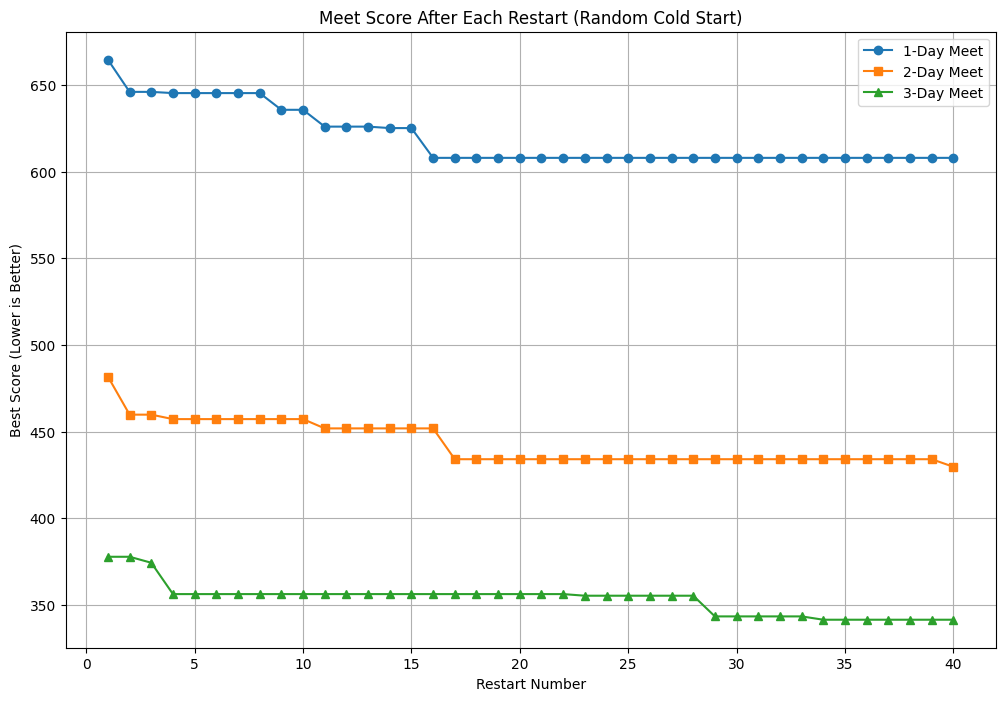


✅ Cold Start Optimization Complete!
Best 1-Day Meet Score (Cold Start): 607.9382859588663
Best 2-Day Meet Score (Cold Start): 429.7264374514372
Best 3-Day Meet Score (Cold Start): 341.49848484848485


In [157]:
#plot all three progressions from every meet optimization
plt.figure(figsize=(12, 8))

plt.plot(range(1, len(score_progression_1day)+1), score_progression_1day, marker='o', label="1-Day Meet")
plt.plot(range(1, len(score_progression_2day)+1), score_progression_2day, marker='s', label="2-Day Meet")
plt.plot(range(1, len(score_progression_3day)+1), score_progression_3day, marker='^', label="3-Day Meet")

plt.title("Meet Score After Each Restart (Random Cold Start)")
plt.xlabel("Restart Number")
plt.ylabel("Best Score (Lower is Better)")
plt.legend()
plt.grid(True)
plt.show()

#print final best scores
print("\n✅ Cold Start Optimization Complete!")
print(f"Best 1-Day Meet Score (Cold Start): {best_score_1day}")
print(f"Best 2-Day Meet Score (Cold Start): {best_score_2day}")
print(f"Best 3-Day Meet Score (Cold Start): {best_score_3day}")


Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...
Restarting after 10000 no improvements...


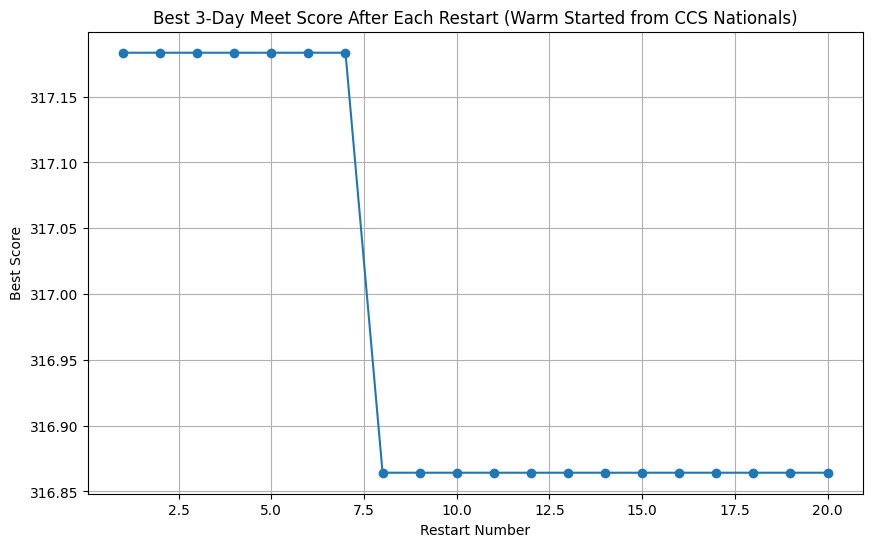


Warm start descend complete!
Best 3-Day Meet Score (starting from CCS Nationals): 316.86424963924964
Successfully found a better meet than CCS Nationals


In [161]:
"""
In an attempt to brute force a meet schedule better than CCS, we can also implement a run where our algorithm is informed of 
CCS's existing schedule beforehand. This will allow the algorithm to use that as its starting point in every restart, so that it wont
get caught in some local valley
"""

# Copy CCS Nationals days as the starting point
day1_init = nationals_day_1.copy()
day2_init = nationals_day_2.copy()
day3_init = nationals_day_3.copy()

# --- Run the hill descend 3 day starting from CCS
best_day1, best_day2, best_day3, best_score, score_progression = hill_descend_3_day(
    day1_init, day2_init, day3_init, 
    max_iterations=200000, 
    max_no_improve=10000, 
    restart_limit=20
)

# --- Plotting the improvements
plt.figure(figsize=(10,6))
plt.plot(range(1, len(score_progression)+1), score_progression, marker='o')
plt.title("Best 3-Day Meet Score After Each Restart (Warm Started from CCS Nationals)")
plt.xlabel("Restart Number")
plt.ylabel("Best Score")
plt.grid(True)
plt.show()

# --- Final output
print("\nWarm start descend complete!")
print(f"Best 3-Day Meet Score (starting from CCS Nationals): {best_score}")

if(best_score < ccs_nationals_score): {
    print("Successfully found a better meet than CCS Nationals")
}
else: {
    print("Failure to find a better meet than CCS Nationals")
}


In [162]:
"""
With a better meet schedule found, we can explore it by exporting both meet schedules to csv files for some side by side comparison

Here is a helper function that helps us turn all our needed data into a sophisticated dataframe
"""

#helper function to prepare side-by-side comparison for one day
def prepare_day_comparison(ccs_day, optimized_day, day_label):
    #calculate the maximum length between ccs and optimized day
    max_len = max(len(ccs_day), len(optimized_day))
    #initialize data storage
    data = []
    
    #loop over all events up to the maximum length
    for i in range(max_len):
        #retrieve ccs event name and id if available
        ccs_event_name = reverse_events_hash[ccs_day[i]] if i < len(ccs_day) else ""
        ccs_event_id = ccs_day[i] if i < len(ccs_day) else ""
        
        #retrieve optimized event name and id if available
        opt_event_name = reverse_events_hash[optimized_day[i]] if i < len(optimized_day) else ""
        opt_event_id = optimized_day[i] if i < len(optimized_day) else ""
        
        #append event comparison to the data list
        data.append({
            "Day": day_label,
            "CCS Event Name": ccs_event_name,
            "CCS Event ID": ccs_event_id,
            "Optimized Event Name": opt_event_name,
            "Optimized Event ID": opt_event_id
        })
    
    #convert collected data into a dataframe
    return pd.DataFrame(data)



In [164]:
"""
Final export of CCS nationals meet compared to optimized meet to a csv file. I included some spacers to make things more human readable
"""


#prepare comparison for each day separately
df_day1 = prepare_day_comparison(nationals_day_1, best_day1, "Day 1")
df_day2 = prepare_day_comparison(nationals_day_2, best_day2, "Day 2")
df_day3 = prepare_day_comparison(nationals_day_3, best_day3, "Day 3")
#create an empty spacer row to separate days visually
spacer = pd.DataFrame([{
    "Day": "",
    "CCS Event Name": "",
    "CCS Event ID": "",
    "Optimized Event Name": "",
    "Optimized Event ID": ""
}])
#concatenate days together with spacer rows between them
df_final = pd.concat([df_day1, spacer, df_day2, spacer, df_day3], ignore_index=True)
#export the final dataframe to a csv file
df_final.to_csv("ccs_vs_optimized_meet_side_by_side.csv", index=False)




print("Exported 'ccs_vs_optimized_meet_side_by_side.csv'")

Exported 'ccs_vs_optimized_meet_side_by_side.csv'
